Датасет NPlus1

In [30]:
import pandas as pd
import os

In [31]:
dataset_path = 'NPlus1/newmetadata.csv'
data = pd.read_csv(dataset_path, delimiter="\t")

data.head()


,segment,textid,textname,textregion,textrubric,textdiff,author,authortexts,authorreaders,magazine,date,time,tags,source
0,nplus1,20151029radar,Французы испытали пассивный «летающий радар»,NaN,Оружие,2.1,Василий Сычев,NaN,NaN,NaN,29 Окт. 2015,16:47,NaN,https://nplus1.ru/news/2015/10/29/radar
1,nplus1,20161212aggressive-drones,Для агрессивных маневров дронам хватило камеры...,NaN,Технологии,2.6,Николай Воронцов,NaN,NaN,NaN,12 Дек. 2016,17:27,NaN,https://nplus1.ru/news/2016/12/12/aggressive-d...
2,nplus1,20150826twinjet-hubble,«Хаббл» получил новые фотографии «крыльев» Баб...,NaN,Технологии,1.1,NaN,NaN,NaN,NaN,26 Авг. 2015,17:46,NaN,https://nplus1.ru/news/2015/08/26/twinjet-hubble
3,nplus1,20150826shining-solved-profile,Криминологи научились вычислять будущих бытовы...,NaN,NaN,4.4,NaN,NaN,NaN,NaN,26 Авг. 2015,14:15,NaN,https://nplus1.ru/news/2015/08/26/shining-solv...
4,nplus1,20160111snow,Ford начал снежные испытания беспилотного авто...,NaN,Транспорт,1.7,Василий Сычев,NaN,NaN,NaN,11 Янв. 2016,09:44,NaN,https://nplus1.ru/news/2016/01/11/snow


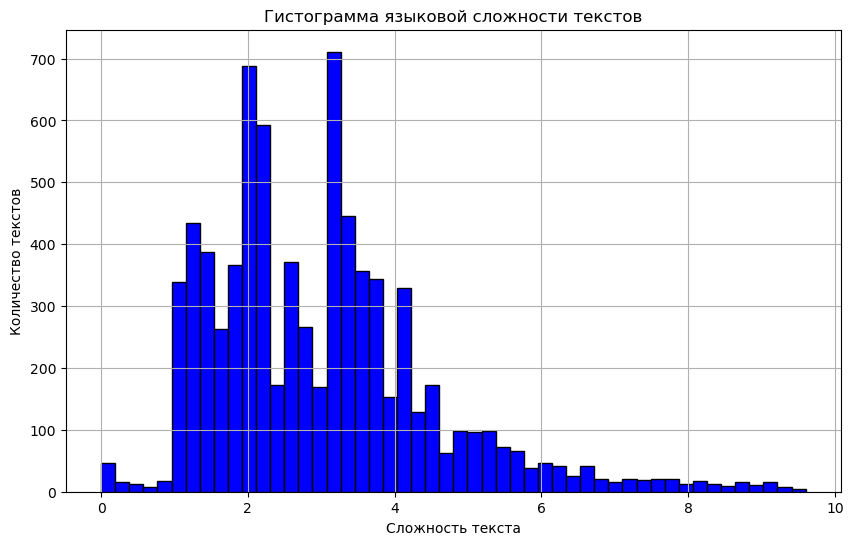

In [32]:
import matplotlib.pyplot as plt

# Гисторгамма 'textdiff'
plt.figure(figsize=(10, 6))
plt.hist(data['textdiff'], bins=50, color='blue', edgecolor='black')
plt.title('Гистограмма языковой сложности текстов')
plt.xlabel('Сложность текста')
plt.ylabel('Количество текстов')
plt.grid(True)
plt.show()


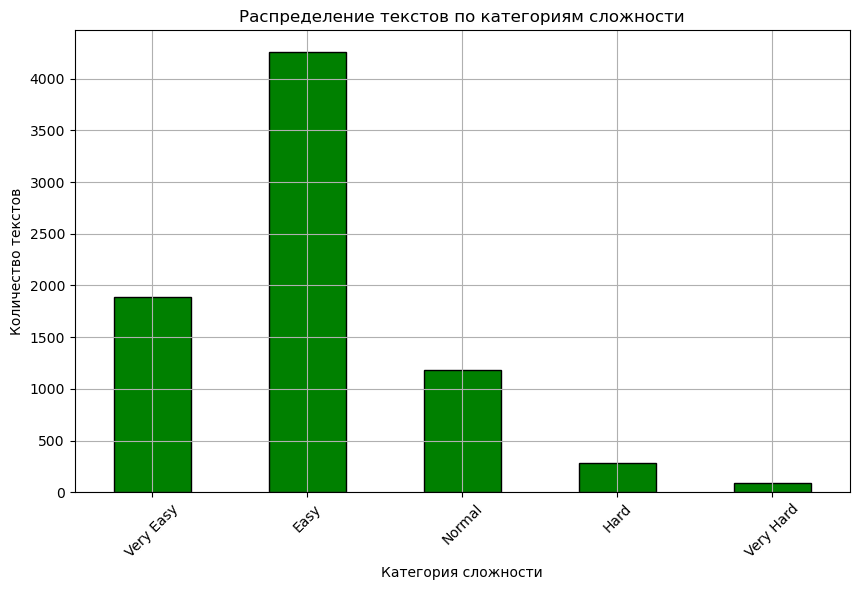

In [33]:
difficulty_ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10)]
difficulty_labels = ['Very Easy', 'Easy', 'Normal', 'Hard', 'Very Hard']

data['difficulty_category'] = pd.cut(data['textdiff'], 
                                     bins=[0, 2, 4, 6, 8, 10], 
                                     labels=difficulty_labels, 
                                     right=False)


plt.figure(figsize=(10, 6))
data['difficulty_category'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Распределение текстов по категориям сложности')
plt.xlabel('Категория сложности')
plt.ylabel('Количество текстов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [34]:
def load_and_split_texts(text_ids, folder_path):
    """
    Загружает тексты, соответствующие указанным textid, из заданной папки, удаляет символы '\n',
    и разбивает тексты на части по не более 300 слов.

    :param text_ids: Список идентификаторов текстов (textid).
    :param folder_path: Путь к папке с текстовыми файлами.
    :return: Словарь, где ключи - это textid, а значения - списки содержащихся в тексте частей.
    """
    texts = {}
    for text_id in text_ids:
        file_path = os.path.join(folder_path, f'{text_id}.txt')
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read().replace('\n', ' ')
                words = text.split()
                texts[text_id] = [' '.join(words[i:i+300]) for i in range(0, len(words), 300)]
        else:
            print(f"Файл для textid '{text_id}' не найден.")
    
    return texts

In [35]:
folder_path = './NPlus1/texts'
text_ids = data['textid']

split_texts = load_and_split_texts(text_ids, folder_path)

text_difficulties = data.set_index('textid')['difficulty_category'].to_dict()

split_dataset = pd.DataFrame([(text_id, part, text_difficulties.get(text_id)) 
                              for text_id, parts in split_texts.items() 
                              for part in parts], 
                             columns=['textid', 'text', 'class'])

split_dataset.head()

,textid,text,class
0,20151029radar,ВВС Франции провели испытания перспективной па...,Easy
1,20161212aggressive-drones,Исследователи из Цюрихского университета научи...,Easy
2,20161212aggressive-drones,собственных датчиков для оперативного ориентир...,Easy
3,20150826twinjet-hubble,Орбитальная обсерватория «Хаббл» получил новые...,Very Easy
4,20150826shining-solved-profile,"Ученые из Бостона выяснили, что практически вс...",Normal


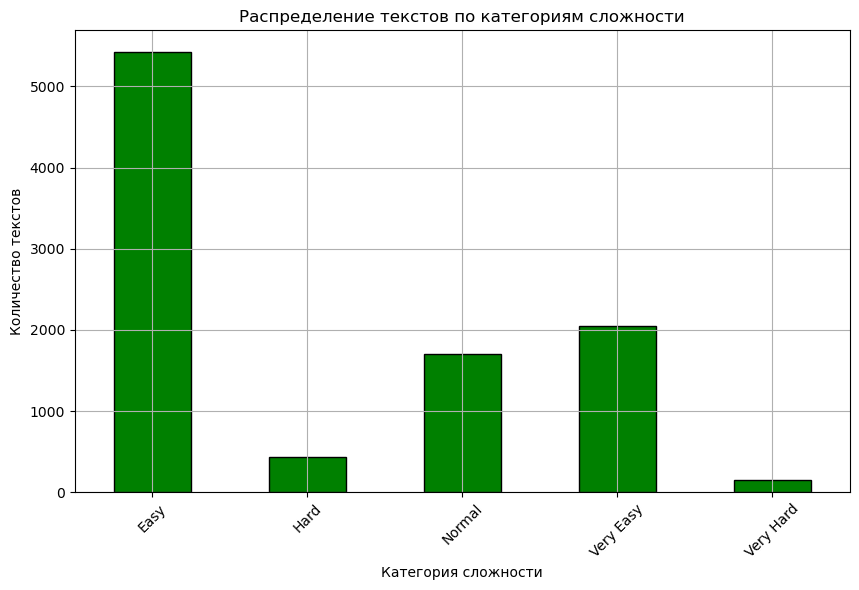

In [36]:
plt.figure(figsize=(10, 6))
split_dataset['class'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Распределение текстов по категориям сложности')
plt.xlabel('Категория сложности')
plt.ylabel('Количество текстов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
split_dataset.to_csv("data_ru.txt", encoding="UTF-8", index=False)

Датасет Кембриджа

In [38]:
dataset_path = "./Readability_dataset"

# Проверка содержимого распакованной директории
extracted_files = os.listdir(dataset_path)
extracted_files.sort()
extracted_files


folder_contents = {}
for folder in extracted_files:
    if not folder.startswith('.'):
        folder_path = os.path.join(dataset_path, folder)
        folder_contents[folder] = os.listdir(folder_path)

In [39]:
# Инициализация списка для хранения данных
data = []

text_dif = {'KET': 'Very Easy', 'PET': 'Easy', 'FCE': 'Normal', 'CAE': 'Hard', 'CPE': 'Very Hard'}

# Чтение и добавление текста из каждого файла в список
for folder in folder_contents:
    for file_name in folder_contents[folder]:
        file_path = os.path.join(dataset_path, folder, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read().replace('\n', ' ').replace('  ', '')
            words = text.split()
            texts = [' '.join(words[i:i+300]) for i in range(0, len(words), 300)]
            for item in texts:
                data.append({'text': item, 'class': text_dif[folder]})
            # text = file.read()
            # data.append({'text': text, 'class': folder})

# Создание DataFrame из списка
df = pd.DataFrame(data)

# Проверка первых нескольких строк DataFrame
df.head()


,text,class
0,BOOK ASteve Martin's Compelling Evidence is co...,Hard
1,a legendary film star's daughter. The author's...,Hard
2,Tapping into a food supplyIn the forests of Ma...,Hard
3,"smelling or hearing the insects, how were the ...",Hard
4,THE DAY I GAVE UP SMOKINGI thought everyone wo...,Hard


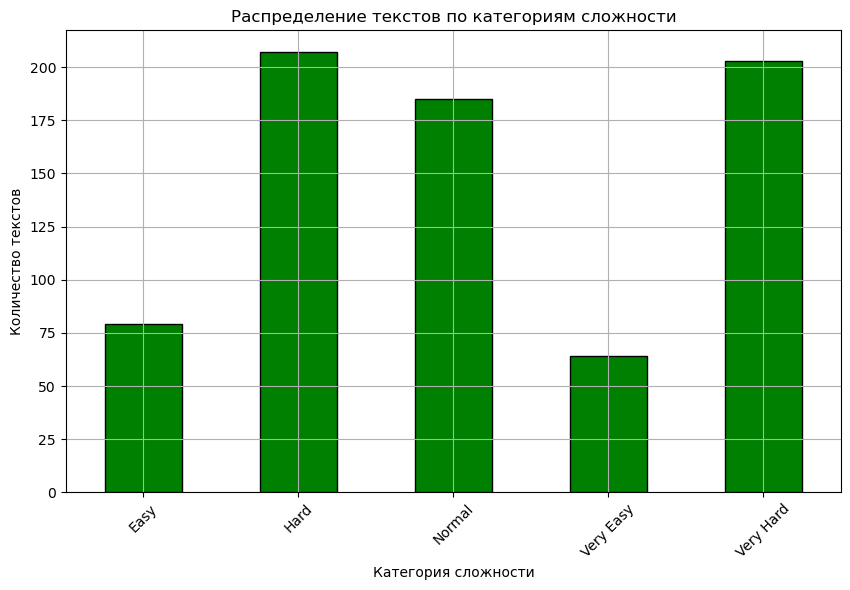

In [41]:
plt.figure(figsize=(10, 6))
df['class'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Распределение текстов по категориям сложности')
plt.xlabel('Категория сложности')
plt.ylabel('Количество текстов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [40]:
df.to_csv("data_en.txt", encoding="UTF-8", index=False)